In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Car_Purchasing_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [2]:
df.describe()

Gender         Age  Annual Salary  Credit Card Debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.224000   62127.239608       9607.645049   
std      0.500465    7.990339   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   41.000000   54391.977195       7397.515792   
50%      1.000000   46.000000   62915.497035       9655.035568   
75%      1.000000   52.000000   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

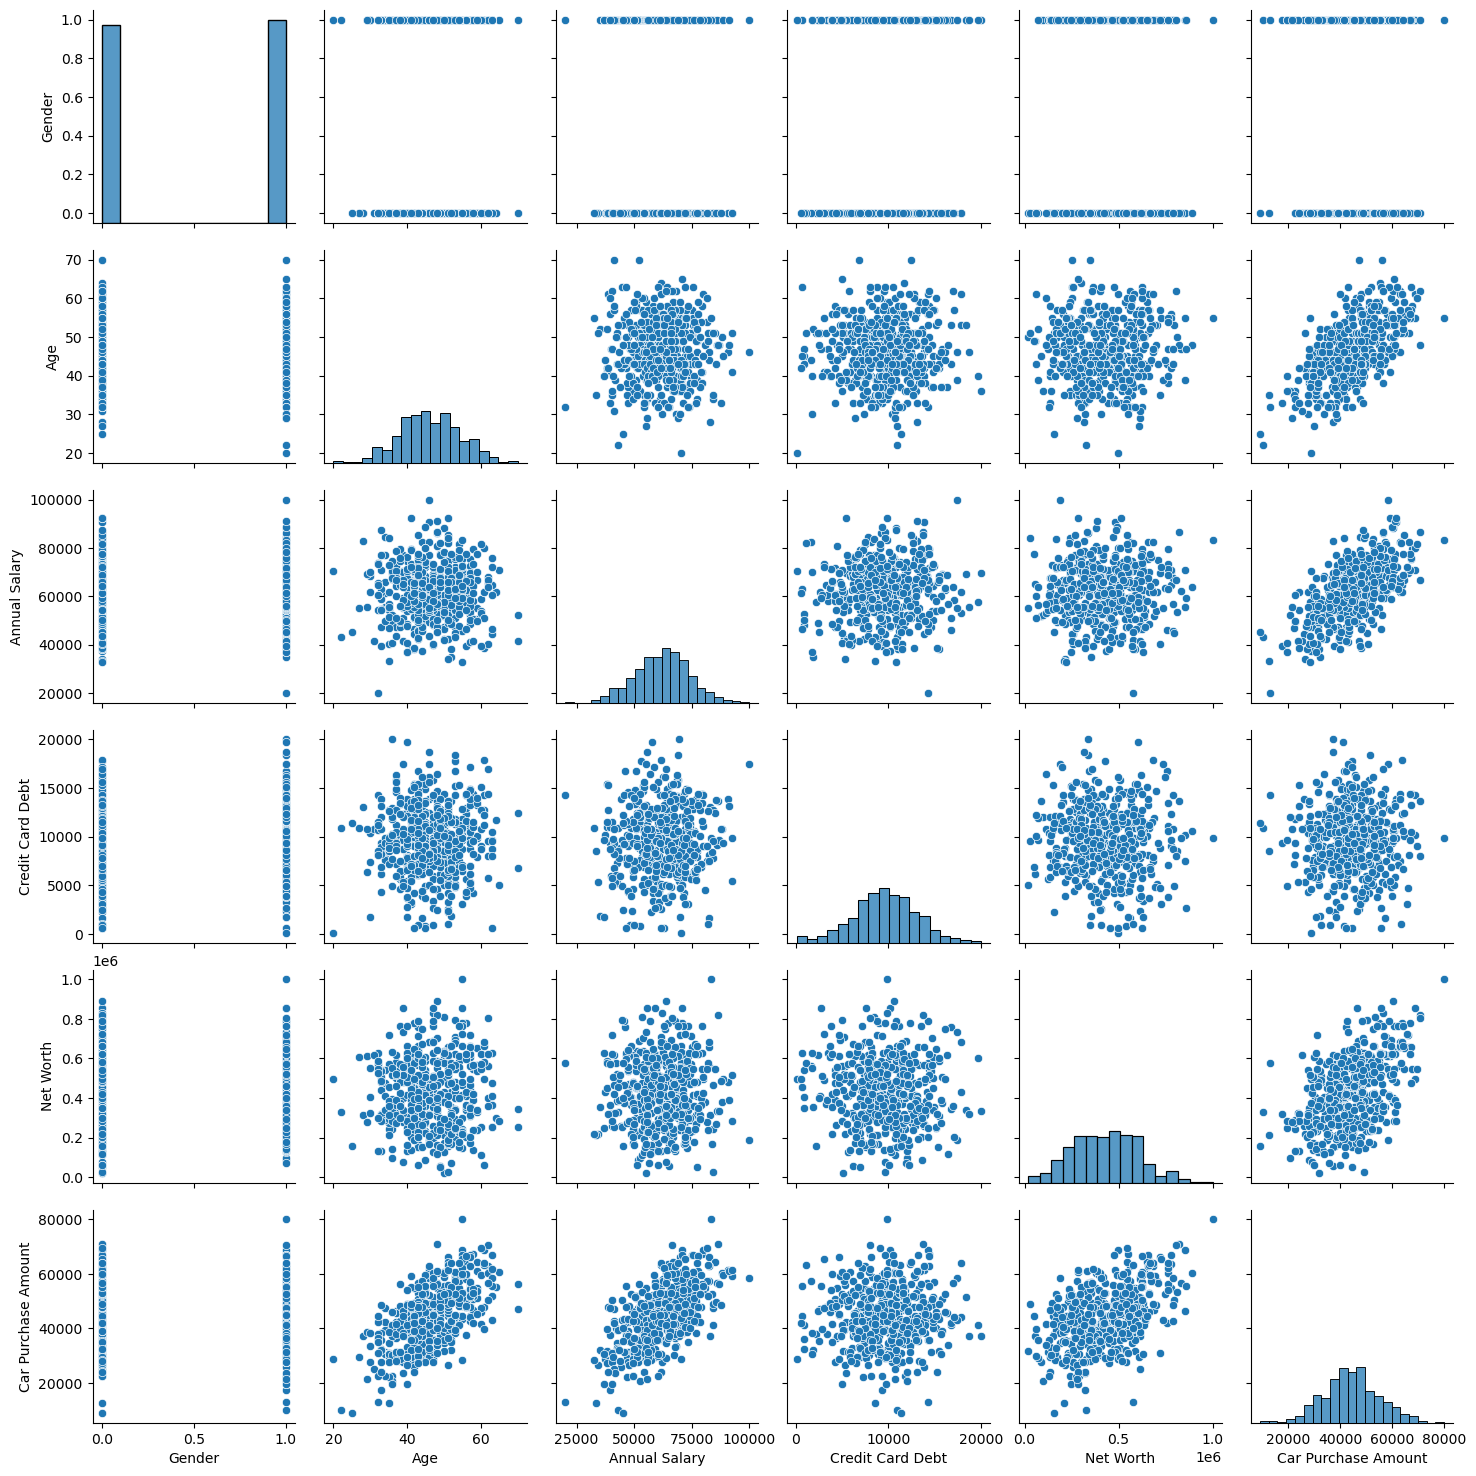

In [3]:
sns.pairplot(df)

In [4]:
carpurchamt = df['Car Purchase Amount']
age = df['Age']
plt.scatter(age,carpurchamt)
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Correlation between car purcahse amount and age')

Text(0.5, 1.0, 'Correlation between car purcahse amount and age')

In [5]:
age_np = age.to_numpy()
carpurchamt_np = carpurchamt.to_numpy()
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(age_np.reshape((500,1)),carpurchamt_np)
sklearn_carpurchamt_prediction = sklearn_model.predict(age_np.reshape((500,1)))
sklearn_carpurchamt_prediction.shape


(500,)

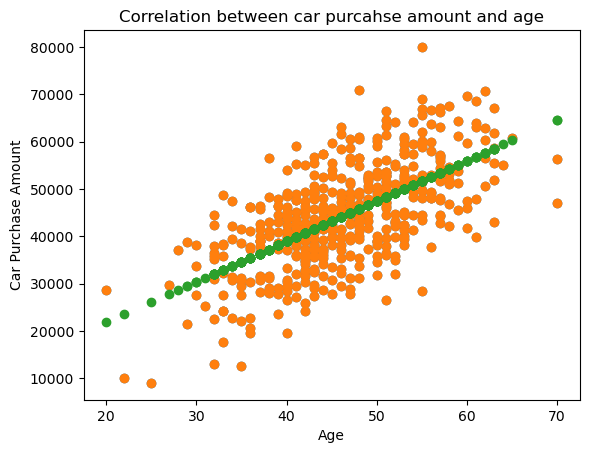

In [6]:
age = df['Age']
carpurchamt = df['Car Purchase Amount']

plt.scatter(age,carpurchamt)
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.scatter(age,sklearn_carpurchamt_prediction)
plt.show()

In [7]:
prediction_df = pd.DataFrame({'Age':age,
                             'Car Purchase Amount':carpurchamt,
                             'Sklearn Car Purchase Amount Predictions':sklearn_carpurchamt_prediction})
prediction_df

Age  Car Purchase Amount  Sklearn Car Purchase Amount Predictions
0     42          35321.45877                             40603.238615
1     41          45115.52566                             39749.412715
2     43          42925.70921                             41457.064515
3     58          67422.36313                             54264.453022
4     57          55915.46248                             53410.627121
..   ...                  ...                                      ...
495   41          48901.44342                             39749.412715
496   38          31491.41457                             37187.935013
497   54          64147.28888                             50849.149420
498   59          45442.15353                             55118.278922
499   47          45107.22566                             44872.368117

[500 rows x 3 columns]

In [8]:
data = df.values
X = data[:,4:5]
Y = data[:,8]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


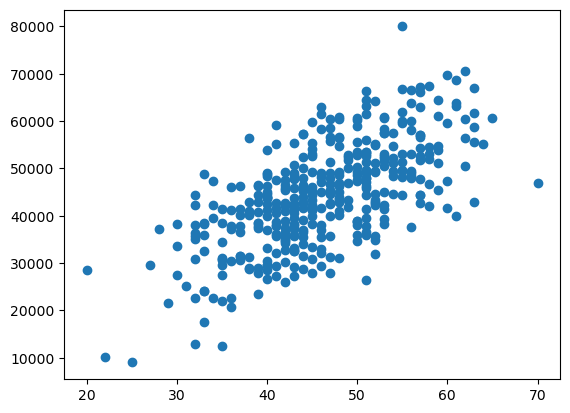

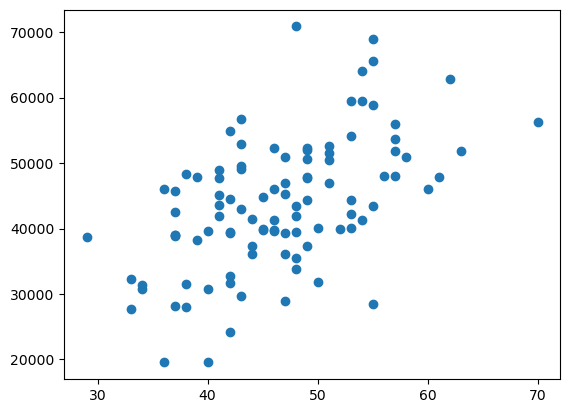

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert X_train and Y_train to float data types
X_train = X_train.astype(float)
Y_train = Y_train.astype(float)

# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Make predictions using the trained model
predictions = lr_model.predict(X_test)

# generate predictions on test data
Y_pred = lr_model.predict(X_test)

plt.scatter(X_train,Y_train)
plt.show()
plt.scatter(X_test,Y_test)
plt.show()

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

# assuming X_train and Y_train are already defined as numpy arrays
# with the input features in X_train and the target variable in Y_train

# create a Linear Regression model and fit to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# assuming X_test is already defined as a numpy array with the input features for prediction
# make predictions on the test data using the trained model
Y_pred = lin_reg.predict(X_test)

# evaluate the model using mean squared error (MSE)
mse = np.mean((Y_test - Y_pred) ** 2)
print("Mean Squared Error: ", mse)

Mean Squared Error:  73432744.3350492


In [11]:
# Data Processing - step 1 in performing Linear Regression

In [12]:
#Checks for if any of the values .
print(df.isnull().sum())

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64


In [13]:
df.dropna()

Customer Name                                    Customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

    Country  Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       USA       0   42    62812.09301      11609.380910  238961.2505   
1       USA       0   41    66646.89292       9572.957136  530973.9078   
2       USA       1   43    53798.55112      11160.355060  638467.1773   
3       USA       1   58    79370.03798      14426.164850  548599.0524   
4       USA       1   57    59729.15130       5358.712177  560304.0671   
..      ...     ...  ...            ...               ...          ...   
495     USA       0   41    71942.40291       6995.902524  541670.1016   
496     USA       1   38    56039.49793      12301.456790  360419.0988   
497     USA       1   54    68888.77805      10611.606860  764531.3203   
498     USA       1   59    49811.99062      14013.034510  337826.6382   
499     USA       1   47    61370.67766       9391.341628  462946.4924   

     Car Purchase Amount  
0            35321.45877  
1            45115.52566  
2            42925.70921  
3            67422.36313  
4            55915.46248  
..                   ...  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566  

[500 rows x 9 columns]

In [14]:
# Exploratory Data Analysis - step 2 in performing Linear Regression

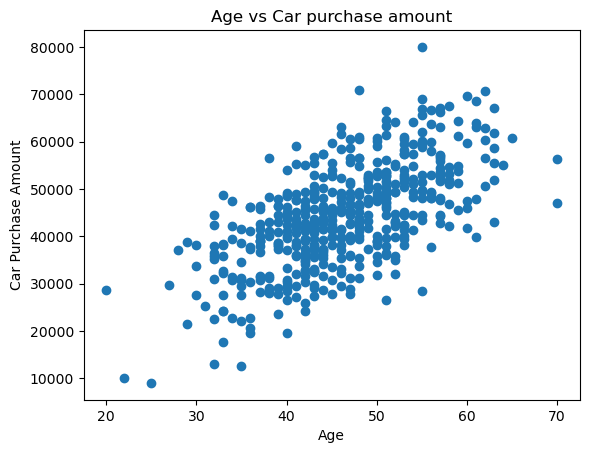

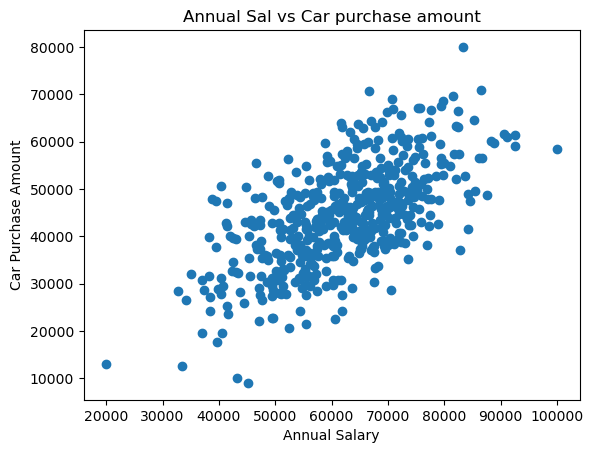

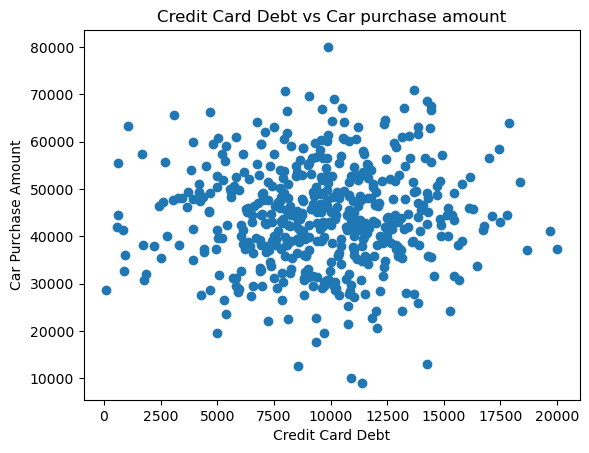

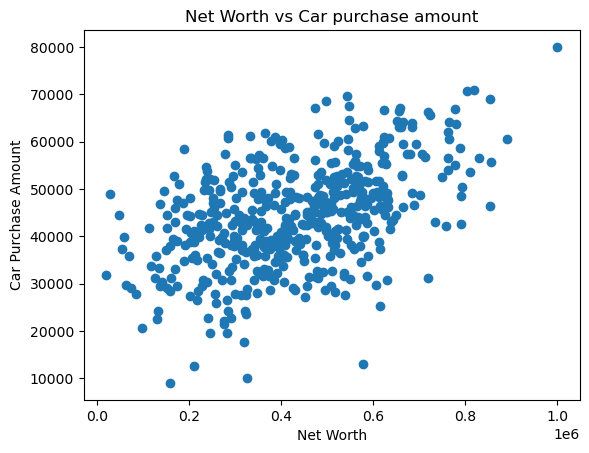

In [15]:
plt.scatter(df['Age'],df['Car Purchase Amount'])
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Age vs Car purchase amount')
plt.show()
plt.scatter(df['Annual Salary'],df['Car Purchase Amount'])
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Annual Sal vs Car purchase amount')
plt.show()
plt.scatter(df['Credit Card Debt'],df['Car Purchase Amount'])
plt.xlabel('Credit Card Debt')
plt.ylabel('Car Purchase Amount')
plt.title('Credit Card Debt vs Car purchase amount')
plt.show()
plt.scatter(df['Net Worth'],df['Car Purchase Amount'])
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.title('Net Worth vs Car purchase amount')
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


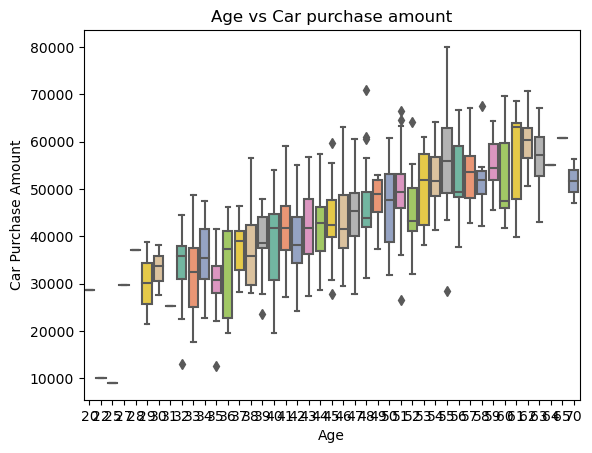

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


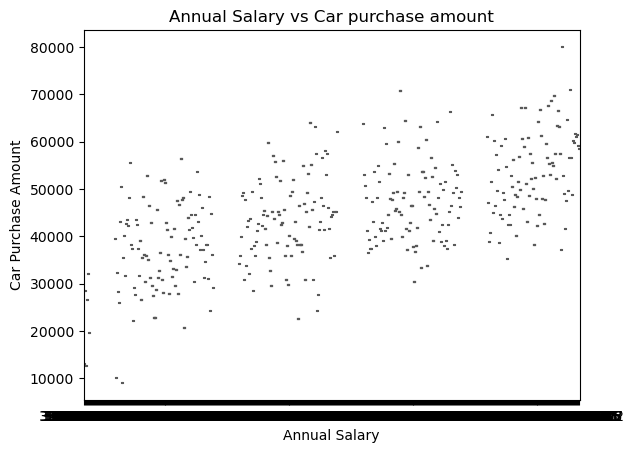

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


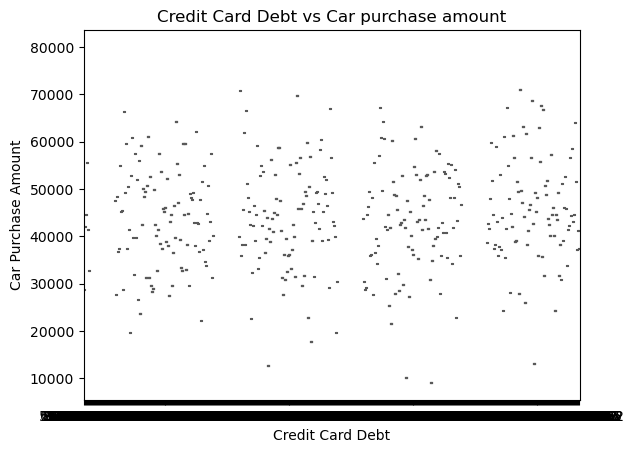

In [16]:
sns.boxplot(df['Age'],df['Car Purchase Amount'],palette = "Set2")
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Age vs Car purchase amount')
plt.show()
sns.boxplot(df['Annual Salary'],df['Car Purchase Amount'],palette = "Set2")
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Annual Salary vs Car purchase amount')
plt.show()
sns.boxplot(df['Credit Card Debt'],df['Car Purchase Amount'],palette = "Set2")
plt.xlabel('Credit Card Debt')
plt.ylabel('Car Purchase Amount')
plt.title('Credit Card Debt vs Car purchase amount')
plt.show()

In [17]:
#Feature Selection - step 3 in linear regression
# my input varaible is X and output variable is Y
Y = df['Car Purchase Amount']
X = df['Age'] 


In [46]:
#Splitting the data into train and testing - step 4 in linear regression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
reshapedXtrain = np.array(X_train).reshape(-1,1)
reshapedXtest = np.array(X_test).reshape(-1,1)
model = LinearRegression()
model.fit(reshapedXtrain, Y_train)
Y_pred = model.predict(reshapedXtest)
newxval = 40
newyval = model.predict(newxval)
newyval

ValueError: Expected 2D array, got scalar array instead:
array=40.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
#Building the linear regression model - step 5
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# create a Lasso model with regularization
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(reshapedXtrain, Y_train)

Y_pred_normal = lin_reg.predict(reshapedXtest)

# calculate mean squared error and R-squared for normal linear regression
mse_normal = mean_squared_error(Y_test, Y_pred_normal)
r2_normal = r2_score(Y_test, Y_pred_normal)

print("Results for Normal Linear Regression Model")
print("Mean Squared Error: ", mse_normal)
print("R-squared: ", r2_normal)

# create an instance of Lasso regression model
lasso_reg = Lasso(alpha=0.001, max_iter=10000)

# fit the model with training data
lasso_reg.fit(reshapedXtrain, Y_train)

# predict the target variable using the test data
Y_pred_lasso = lasso_reg.predict(reshapedXtest)

# calculate mean squared error and R-squared for Lasso regression
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print("\nResults for Lasso Regression Model")
print("Mean Squared Error: ", mse_lasso)
print("R-squared: ", r2_lasso)

Results for Normal Linear Regression Model
Mean Squared Error:  51771443.61944999
R-squared:  0.48942021373900124

Results for Lasso Regression Model
Mean Squared Error:  51584877.28132864
R-squared:  0.4912601663148206


In [24]:
c = model.intercept_
print("The intercept is: ",c)
m = model.coef_
print("The co efficient is: ", m)
Y_pred_train = m * reshapedXtrain + c
Y_pred_train


The intercept is:  4620.536249584184
The co efficient is:  [857.79913275]


array([[41505.89895788],
       [43221.49722338],
       [50083.89028539],
       [45794.89462163],
       [43221.49722338],
       [47510.49288713],
       [45794.89462163],
       [51799.48855089],
       [40648.09982513],
       [32070.10849762],
       [55230.68508189],
       [41505.89895788],
       [40648.09982513],
       [47510.49288713],
       [48368.29201989],
       [40648.09982513],
       [54372.88594914],
       [33785.70676312],
       [45794.89462163],
       [44937.09548888],
       [44079.29635613],
       [55230.68508189],
       [45794.89462163],
       [51799.48855089],
       [32070.10849762],
       [41505.89895788],
       [44079.29635613],
       [41505.89895788],
       [52657.28768364],
       [41505.89895788],
       [39790.30069238],
       [32927.90763037],
       [39790.30069238],
       [48368.29201989],
       [49226.09115264],
       [53515.08681639],
       [34643.50589587],
       [35501.30502862],
       [37216.90329412],
       [39790.30069238],


In [26]:
Y_pred_train1 = model.predict(reshapedXtrain)
Y_pred_train1

array([41505.89895788, 43221.49722338, 50083.89028539, 45794.89462163,
       43221.49722338, 47510.49288713, 45794.89462163, 51799.48855089,
       40648.09982513, 32070.10849762, 55230.68508189, 41505.89895788,
       40648.09982513, 47510.49288713, 48368.29201989, 40648.09982513,
       54372.88594914, 33785.70676312, 45794.89462163, 44937.09548888,
       44079.29635613, 55230.68508189, 45794.89462163, 51799.48855089,
       32070.10849762, 41505.89895788, 44079.29635613, 41505.89895788,
       52657.28768364, 41505.89895788, 39790.30069238, 32927.90763037,
       39790.30069238, 48368.29201989, 49226.09115264, 53515.08681639,
       34643.50589587, 35501.30502862, 37216.90329412, 39790.30069238,
       33785.70676312, 38074.70242687, 50083.89028539, 46652.69375438,
       40648.09982513, 48368.29201989, 41505.89895788, 41505.89895788,
       42363.69809063, 35501.30502862, 48368.29201989, 37216.90329412,
       47510.49288713, 44079.29635613, 44079.29635613, 37216.90329412,
      

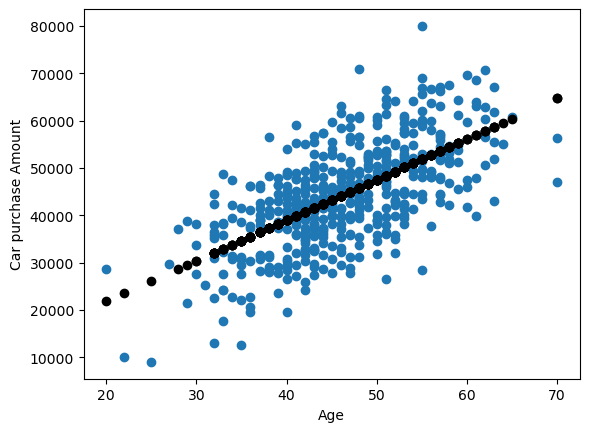

In [33]:
plt.scatter(X,Y)
plt.scatter(reshapedXtrain,Y_pred_train1,color="black")
plt.xlabel('Age')
plt.ylabel('Car purchase Amount')
plt.show()

In [34]:
Y_pred_test1 = model.predict(reshapedXtest)
Y_pred_test1


array([47510.49288713, 41505.89895788, 50083.89028539, 44079.29635613,
       41505.89895788, 58661.8816129 , 48368.29201989, 41505.89895788,
       38074.70242687, 36359.10416137, 39790.30069238, 56088.48421464,
       44937.09548888, 43221.49722338, 57804.08248015, 30354.51023211,
       42363.69809063, 38932.50155962, 38074.70242687, 35501.30502862,
       32927.90763037, 39790.30069238, 50083.89028539, 43221.49722338,
       38932.50155962, 44937.09548888, 58661.8816129 , 36359.10416137,
       50941.68941814, 38932.50155962, 40648.09982513, 33785.70676312,
       56088.48421464, 40648.09982513, 38074.70242687, 37216.90329412,
       34643.50589587, 48368.29201989, 53515.08681639, 44937.09548888,
       52657.28768364, 31212.30936487, 41505.89895788, 35501.30502862,
       56946.2833474 , 53515.08681639, 29496.71109936, 50083.89028539,
       43221.49722338, 39790.30069238, 44079.29635613, 38932.50155962,
       38932.50155962, 44937.09548888, 42363.69809063, 27781.11283386,
      

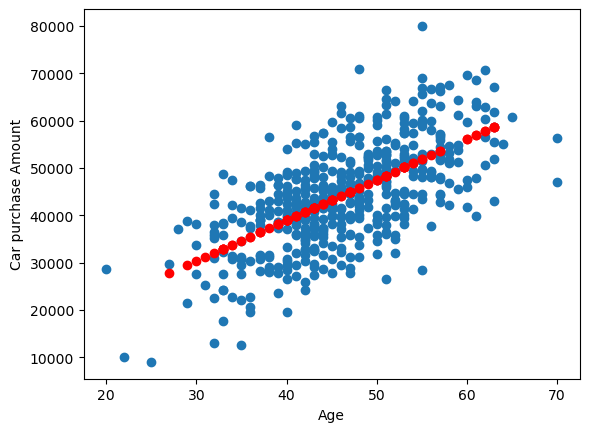

In [35]:
plt.scatter(X,Y)
plt.scatter(reshapedXtest,Y_pred_test1,color="red")
plt.xlabel('Age')
plt.ylabel('Car purchase Amount')
plt.show()

In [41]:
#Model evaluation
model.score(reshapedXtrain,Y_pred_train)

1.0

In [49]:
newx = ([31,22,61])
newx = pd.DataFrame(newx)
newy = model.predict(newx)
newy = pd.DataFrame(newy)
df = pd.concat([newx,newy],axis=1, keys = ["Age_new","Car_Purchase_Amount_new"])
df

Age_new Car_Purchase_Amount_new
        0                       0
0      31            31020.711055
1      22            23192.016317
2      61            57116.360185

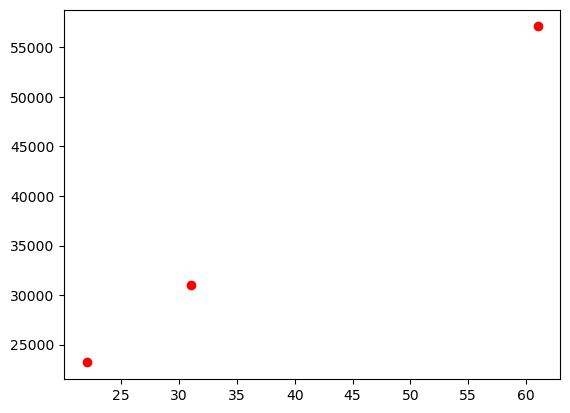

In [55]:

plt.scatter(newx,model.predict(newx),color='red')

plt.show()